In [8]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

print("Các thư viện cho việc huấn luyện mô hình đã sẵn sàng.")

Các thư viện cho việc huấn luyện mô hình đã sẵn sàng.


In [10]:
# Đường dẫn tới file dữ liệu
processed_data_path = '../data/processed/customer_features.csv'

# Đọc dữ liệu
df = pd.read_csv(processed_data_path)

# Kiểm tra dữ liệu
print(f"Đã tải {len(df)} dòng dữ liệu khách hàng.")
df.info()
df.head()

Đã tải 4338 dòng dữ liệu khách hàng.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4338 non-null   int64  
 1   Frequency      4338 non-null   int64  
 2   MonetaryValue  4338 non-null   float64
 3   Churn          4338 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 135.7 KB


,Recency,Frequency,MonetaryValue,Churn
0,326,1,77183.60,1
1,2,7,4310.00,0
2,75,4,1797.24,0
3,19,1,1757.55,0
4,310,1,334.40,1


In [11]:
# Xác định features (X) và target (y)
X = df[['Recency', 'Frequency', 'MonetaryValue']]
y = df['Churn']

# Phân chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
# stratify=y đảm bảo tỷ lệ churn/non-churn trong tập train và test là như nhau
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Để kết quả có thể tái lập
    stratify=y
)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện: (3470, 3)
Kích thước tập kiểm tra: (868, 3)


In [12]:
# Xây dựng pipeline
# class_weight='balanced' giúp mô hình chú ý hơn đến lớp thiểu số (churn), rất hữu ích khi dữ liệu mất cân bằng.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

print("Pipeline đã được xây dựng.")

Pipeline đã được xây dựng.


Bắt đầu huấn luyện mô hình...
Huấn luyện hoàn tất!

--- Báo cáo Phân loại (Classification Report) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       290

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

Điểm ROC AUC: 1.0000


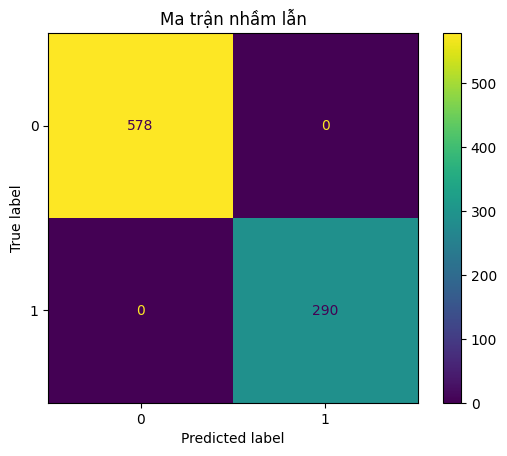

In [13]:
# Huấn luyện pipeline trên dữ liệu training
print("Bắt đầu huấn luyện mô hình...")
pipeline.fit(X_train, y_train)
print("Huấn luyện hoàn tất!")

# Đưa ra dự đoán trên dữ liệu test
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1] # Lấy xác suất cho lớp churn (1)

# Đánh giá mô hình
print("\n--- Báo cáo Phân loại (Classification Report) ---")
print(classification_report(y_test, y_pred))

# Tính điểm ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Điểm ROC AUC: {roc_auc:.4f}")

# Vẽ ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Ma trận nhầm lẫn')
plt.show()

In [15]:
# Đường dẫn để lưu model
model_path = '../models/churn_predictor.joblib'

# Dùng joblib để lưu pipeline
joblib.dump(pipeline, model_path)

print(f"\nMô hình đã được lưu thành công tại: {model_path}")


Mô hình đã được lưu thành công tại: ../models/churn_predictor.joblib
